In [2]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_excel(r'C:\Users\katar\Desktop\mtel praksa\moje\moviesCsv[552].xlsx')

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [6]:

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [4]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [5]:
df['yearcorrect']= df['released'].str.extract(r'(\d{4})')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0,2020
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0,2020
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0,2020


In [12]:
df.sort_values(by = ['gross'], inplace=False, ascending=False).tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,GÃ©rard KikoÃ¯ne,J.P. FÃ©lix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor TakÃ¡cs,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,0,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,IldikÃ³ Enyedi,IldikÃ³ Enyedi,Dorota Segda,Hungary,0,0,Budapest StÃºdiÃ³ VÃ¡llalat,104.0,1990
7667,Tee em el,0,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,0,0,PK 65 Films,102.0,2020


In [18]:
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2385, dtype: object

In [17]:
df['company']=df['company'].replace([0],None)

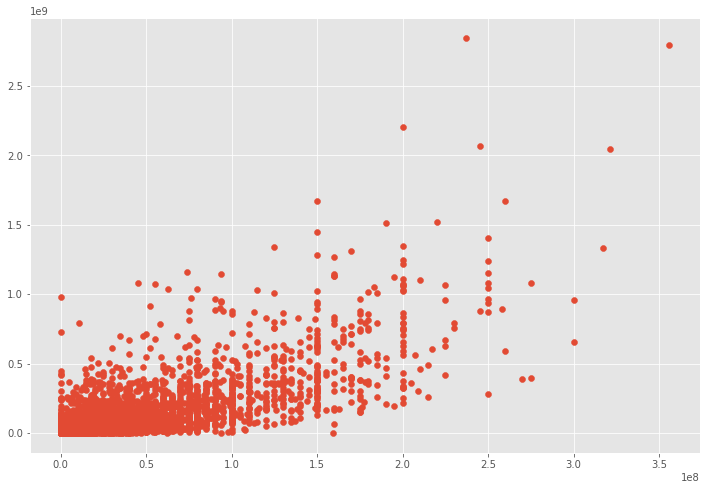

In [19]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

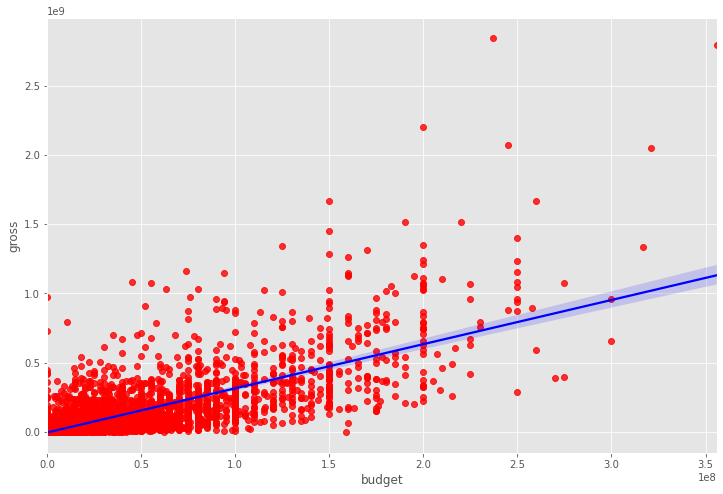

In [21]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={"color":"blue"})

In [23]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


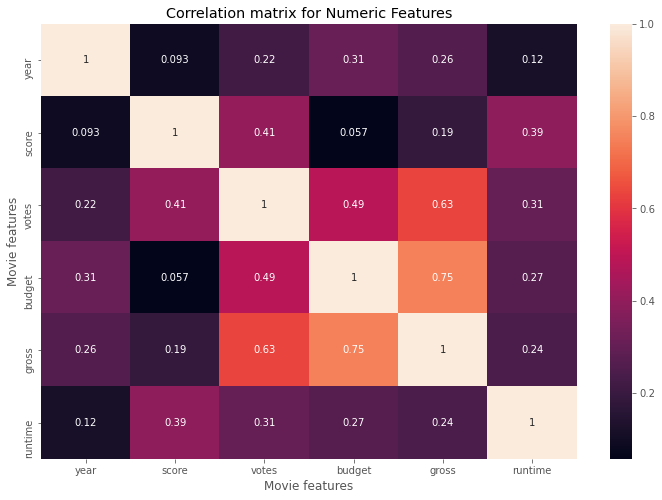

In [24]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [25]:


df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,7,6,1980,1706,8.4,927000.0,2589,4015,1048,55,19000000,46998772,2319,146.0,0
1,5573,7,1,1980,1493,5.8,65000.0,2269,1633,328,56,4500000,58853106,731,104.0,0
2,5142,5,0,1980,1772,8.7,1200000.0,1111,2568,1746,56,18000000,538375067,1540,124.0,0
3,286,5,4,1980,1493,7.7,221000.0,1301,2001,2247,56,3500000,83453539,1812,88.0,0
4,1027,7,4,1980,1544,7.3,108000.0,1054,522,411,56,6000000,39846344,1777,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,0,6,2020,2965,3.1,18.0,1500,2290,2422,56,7000,0,884,90.0,40
7664,1678,0,4,2020,1108,4.7,36.0,774,2615,1887,56,0,0,539,90.0,40
7665,4717,0,6,2020,194,5.7,29.0,2061,2684,2041,56,58750,0,941,0.0,40
7666,2843,0,6,2020,2818,0.0,0.0,1184,1825,451,56,15000,0,941,120.0,40


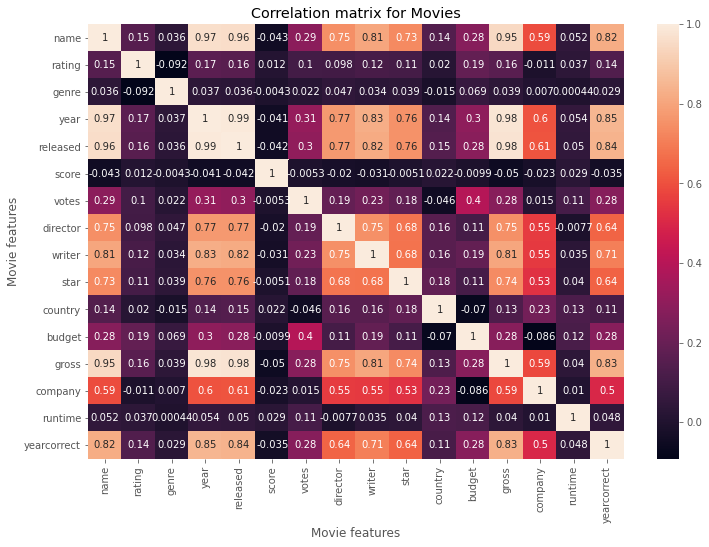

In [26]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [27]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008061,0.016334,0.011440,-0.011317,0.016375,0.013032,0.009071,0.009063,0.006465,-0.010738,0.020544,0.006979,0.009991,0.008487,0.010212
rating,-0.008061,1.000000,0.072423,0.008779,0.016613,0.006192,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.037111,0.064133,0.006403
genre,0.016334,0.072423,1.000000,-0.081261,0.029822,0.027384,-0.145296,-0.015258,0.006565,-0.005477,-0.037615,-0.334021,-0.234297,-0.070347,-0.052914,-0.078210
year,0.011440,0.008779,-0.081261,1.000000,-0.000695,0.092616,0.222427,-0.020795,-0.008654,-0.027242,-0.070938,0.309212,0.261900,-0.009918,0.116358,0.996397
released,-0.011317,0.016613,0.029822,-0.000695,1.000000,0.039814,0.015878,-0.001478,-0.002402,0.015777,-0.020427,0.009145,0.000519,-0.009978,0.004852,-0.003775
score,0.016375,0.006192,0.027384,0.092616,0.039814,1.000000,0.407101,0.010568,0.022097,-0.000026,-0.133346,0.056863,0.186012,0.000955,0.394564,0.100897
votes,0.013032,0.033743,-0.145296,0.222427,0.015878,0.407101,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.132588,0.306984,0.217782
director,0.009071,0.019483,-0.015258,-0.020795,-0.001478,0.010568,0.000349,1.000000,0.299066,0.039234,0.017490,0.004976,-0.014916,0.004536,0.017062,-0.020385
writer,0.009063,-0.005921,0.006565,-0.008654,-0.002402,0.022097,0.001127,0.299066,1.000000,0.027245,0.015345,-0.025911,-0.022997,0.004648,-0.004037,-0.008390
star,0.006465,0.013405,-0.005477,-0.027242,0.015777,-0.000026,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.010745,0.009418,-0.027606


In [36]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating         0.154269
             genre          0.036367
             year           0.965761
             released       0.959855
                              ...   
yearcorrect  budget         0.279686
             gross          0.830429
             company        0.497283
             runtime        0.047987
             yearcorrect    1.000000
Length: 256, dtype: float64

In [37]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        rating        -0.091898
rating       genre         -0.091898
company      budget        -0.086454
budget       company       -0.086454
country      budget        -0.069766
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [38]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

star         company        0.530244
company      star           0.530244
             writer         0.550117
writer       company        0.550117
director     company        0.553829
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 86, dtype: float64